In [19]:
%pylab notebook
import requests
import time

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [7]:
req = requests.get('https://app-prod-ws.meteoswiss-app.ch/v1/plzDetail', {'plz': 1202 * 100})
print(req)

dat = req.json()

<Response [200]>


In [42]:
req.url

'https://app-prod-ws.meteoswiss-app.ch/v1/plzDetail?plz=120200'

In [18]:
time.time()

1723374987.0081005

In [26]:
dat['graph'].keys()

dict_keys(['start', 'startLowResolution', 'precipitation10m', 'precipitationMin10m', 'precipitationMax10m', 'weatherIcon3h', 'weatherIcon3hV2', 'windDirection3h', 'windSpeed3h', 'sunrise', 'sunset', 'temperatureMin1h', 'temperatureMax1h', 'temperatureMean1h', 'precipitation1h', 'precipitationMin1h', 'precipitationMax1h'])

In [36]:
start = dat['graph']['start']
sunrise = dat['graph']['sunrise']
sunrise

[1723350588096,
 1723437063179,
 1723523538382,
 1723610013683,
 1723696489060,
 1723782964496]

In [41]:
dat['graph']['weatherIcon3h']

[101,
 101,
 1,
 1,
 1,
 1,
 12,
 112,
 103,
 102,
 2,
 1,
 2,
 2,
 1,
 101,
 101,
 101,
 1,
 1,
 1,
 2,
 12,
 103,
 126,
 102,
 3,
 3,
 9,
 13,
 24,
 106,
 103,
 103,
 3,
 2,
 2,
 2,
 2,
 101,
 101,
 101,
 1,
 1,
 1,
 2,
 2,
 102]

<IPython.core.display.Javascript object>


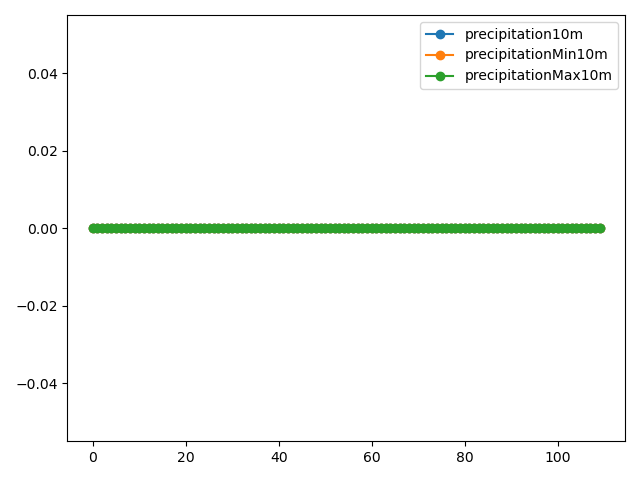

In [29]:
for l in ['precipitation10m', 'precipitationMin10m', 'precipitationMax10m']:
    plot(dat['graph'][l], '-o', label=l)
legend()
tight_layout()

<IPython.core.display.Javascript object>


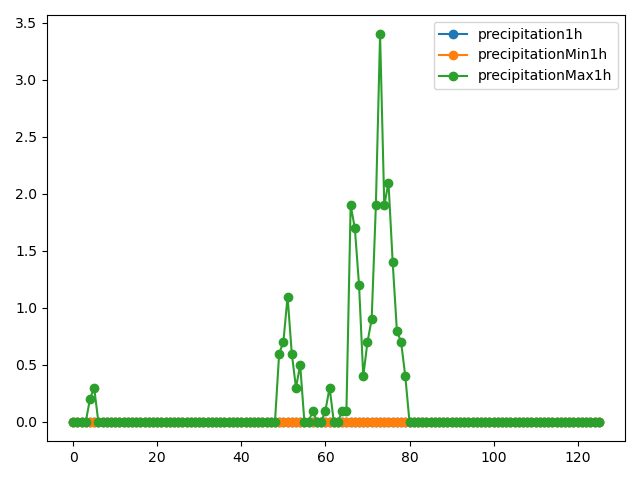

In [35]:
close()
for l in ['precipitation1h', 'precipitationMin1h', 'precipitationMax1h']:
    plot(dat['graph'][l], '-o', label=l)
legend()
tight_layout()

<IPython.core.display.Javascript object>


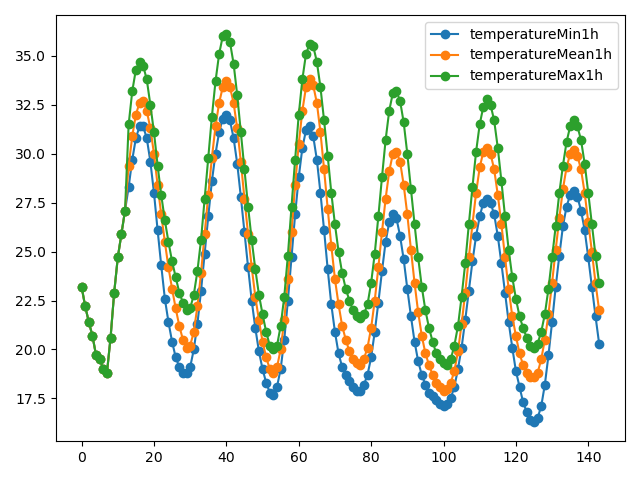

In [32]:
close()
for l in ['temperatureMin1h', 'temperatureMean1h', 'temperatureMax1h']:
    y = dat['graph'][l]
    plot(y, '-o', label=l)
legend()
tight_layout()

In [44]:
datetime.datetime.fromtimestamp(1723327200000 / 1000)

datetime.datetime(2024, 8, 11, 0, 0)